![an artist who join "KCON Thailand 2019"](img\kcon.jpg)

# Import necessary library

In [5]:
import json
import pandas as pd

# Read data

In [6]:
tweets_data = []

In [9]:
tweets_data_path = 'tweet_data_3.txt'

tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
print(len(tweets_data))

28039


In [10]:
# tweets_data[len(tweets_data)-1]

# Reformat time and convert UTC To THAI time zone

In [11]:
from datetime import datetime, timezone
import pytz

In [12]:
thai_tz = pytz.timezone('Asia/Bangkok') # thai time zone

In [13]:
# tweets_data[len(tweets_data)-1]

In [14]:
# find error
lst_error = []
for i in range(len(tweets_data)):
    try:
        tweets_data[i]['created_at'].split(' ')
    except:
        lst_error.append(i)

In [15]:
print(lst_error)

[534]


In [16]:
# tweets_data[73159]

In [17]:
day = []
for i in range(len(tweets_data)):
    if i not in lst_error:
        lst = tweets_data[i]['created_at'].split(' ')
        tweets_data[i]['id'] = lst[0] # เก็บวันไวเในช่อง id
        date = (lst[5]+'.'+lst[1]+'.'+lst[2]+' '+lst[3])
        date_time = datetime.strptime(date, '%Y.%b.%d %H:%M:%S')
        tweets_data[i]['created_at'] =  date_time.replace(tzinfo=timezone.utc).astimezone(thai_tz) # reset info and convert to thai timezone
#         thai_time.strftime('%Y-%m-%d %H:%M:%S') # return time format yyyy-mm-dd hh:mm:ss
#         print(tweets_data[i]['created_at'])
#     else:
#         print(i)

In [18]:
tweets_data[73159]

IndexError: list index out of range

In [ ]:
# Remove error

In [19]:
# if len(lst_error) != 0:
#     while True:
#         try:
#             for i in lst_error:
#                 del(tweets_data[i])
#                 print('delete complete')
#         except:
#             break

# Test area

In [20]:
# tweets_data[73208]

In [21]:
for i in range(len(tweets_data)):
    try:
        check = tweets_data[i]['created_at']
    except:
        print(i)

534


In [22]:
time = [tweets_data[i]['created_at'] for i in range(len(tweets_data)) if i not in lst_error]
language = [tweets_data[i]['lang'] for i in range(len(tweets_data)) if i not in lst_error]
text =[tweets_data[i]['text'] for i in range(len(tweets_data)) if i not in lst_error]
day = [tweets_data[i]['id'] for i in range(len(tweets_data)) if i not in lst_error]

In [23]:
df = pd.DataFrame({'time':time, 'day':day, 'language':language, 'text':text})

In [24]:
tweets_data[len(tweets_data)-1]

{'created_at': datetime.datetime(2019, 9, 1, 0, 2, 11, tzinfo=<DstTzInfo 'Asia/Bangkok' +07+7:00:00 STD>),
 'id': 'Sat',
 'id_str': '1167845048613916672',
 'text': 'RT @KCONThailand: [#KCON2019THAILAND]\nLove Call สำหรับ ONE IT พิกกี้บูบู้ของ #X1\nตอบรับกันตอนนี้เลย!\n\nการพบกันครั้งแรกของ X1 และ ONE IT ➤ h…',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 826833975272312832,
  'id_str': '826833975272312832',
  'name': 'จินยองแจ ซึงพโย',
  'screen_name': 'JY0922_CYJ333',
  'location': None,
  'url': None,
  'description': 'GOT7\u200b |\n2YOUNG\u200b🍑🌙\nจินยองแจ\u200b🍊\n280618\nX1\nSeungpyo\n200719',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 22,
  'friends_count': 161,
  'listed_count':

In [25]:
df.tail(5)

,time,day,language,text
28033,2019-09-01 00:01:52+07:00,Sat,en,RT @KCONThailand: [#KCON2019THAILAND ]\nHappy ...
28034,2019-09-01 00:01:53+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...
28035,2019-09-01 00:02:04+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND] SPECIAL ...
28036,2019-09-01 00:02:11+07:00,Sat,en,RT @hiddenyoun: 🙏🏻 #KCON2019THAILAND\n\nI’m lo...
28037,2019-09-01 00:02:11+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...


In [26]:
df['language'].value_counts()

th     26558
en       954
und      319
ko        61
in        52
tl        22
ja        19
es        13
tr         9
pt         7
vi         4
ru         4
it         3
et         2
fr         2
lt         2
zh         2
my         1
ro         1
de         1
ar         1
ht         1
Name: language, dtype: int64

In [27]:
tweets_data[700]

{'created_at': datetime.datetime(2019, 8, 31, 7, 22, 48, tzinfo=<DstTzInfo 'Asia/Bangkok' +07+7:00:00 STD>),
 'id': 'Sat',
 'id_str': '1167593546091646976',
 'text': 'RT @KCONThailand: [#KCON2019THAILAND]\nLove Call สำหรับ ONE IT พิกกี้บูบู้ของ #X1\nตอบรับกันตอนนี้เลย!\n\nการพบกันครั้งแรกของ X1 และ ONE IT ➤ h…',
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1154371727050174464,
  'id_str': '1154371727050174464',
  'name': 'nan',
  'screen_name': 'hanyoyoyohan',
  'location': 'weishin seungchan yuyo younjin',
  'url': None,
  'description': '₍☕₎ˀˀ . . #⃞YOHAN: 𝐡𝐞𝐚𝐯𝐞𝐧 𝘪𝘴 𝘢 𝘱𝘭𝘢𝘤𝘦 𝘰𝘯 𝐞𝐚𝐫𝐭𝐡 𝘸𝘪𝘵𝘩 𝘺𝘰𝘶',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 774,
  'friends_count': 773,
  'listed_count': 15

In [28]:
hashtag = []
for j in range(len(tweets_data)):
    if j not in lst_error:
        for i in range(len(tweets_data[j]['entities']['hashtags'])):
            hashtag.append(tweets_data[j]['entities']['hashtags'][i]['text'].upper())
#           print(tweets_data[j]['entities']['hashtags'][i]['text'])

In [29]:
print(len(tweets_data))

28039


In [30]:
len(hashtag)

54022

In [31]:
hashtag_df = pd.DataFrame({'hashtag':hashtag})

In [32]:
hashtag_df['hashtag'].value_counts().head(50)

KCON2019THAILAND        23579
X1                      16954
KCON19TH                 1609
ONEIT                    1185
วันอิท                   1165
GOT7                     1024
KCONTHAILAND2019          921
THEBOYZ                   915
IZONE                     850
KCON                      702
STRAYKIDS                 641
GOT7FANFESTINBKK          272
YUJIN                     236
IZONE_KCON                235
X1_KCON                   145
BOYSTORY                  120
ตลาดนัดX1                  81
AB6IX1STFMINBKK            70
X1_FLAϞH                   67
COVERSTARK                 63
ตลาดนัดอากาเซ่             63
엑스원                        53
CHAEUNWOOINBKK             52
보이스토리                      50
男孩的故事                      50
EXPLORATIONINBKK           43
ITZY                       43
AB6IX                      42
โปรเจคเด็กหลง              41
KIMJAEHWAN                 37
갓세븐                        37
JINHYUKHAEINTHAILAND       36
JSWZEROINBKK               32
พีชแพท    

# Refference

In [33]:
# def utc_to_local(utc_dt):
#     new_time =  utc_dt.replace(tzinfo=timezone.utc).astimezone(thai_tz) # reset info and convert to thai timezone
#     return new_time.strftime('%Y-%m-%d %H:%M:%S') # return time format yyyy-mm-dd hh:mm:ss

# utc_to_local(tweets_data[len(tweets_data)-1]['created_at'])

In [34]:
bins = list(range(0, 25*3600, 2*3600)) # แบ่งช่วงละ 2 ชั่วโมงและแปลงช่วงเป็นวินาที
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-24'] # กำหนด label ของช่วง
# print(list(range(0, 25, 2)))
# bins

In [35]:
df

,time,day,language,text
0,2019-08-31 07:00:08+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...
1,2019-08-31 07:00:15+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND] SPECIAL ...
2,2019-08-31 07:00:17+07:00,Sat,th,RT @mekoonmonday: มาจ้าโปรเปิดร้านพรีสินค้าราค...
3,2019-08-31 07:00:18+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...
4,2019-08-31 07:00:29+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...
5,2019-08-31 07:00:31+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...
6,2019-08-31 07:00:31+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND] SPECIAL ...
7,2019-08-31 07:00:35+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...
8,2019-08-31 07:00:44+07:00,Sat,th,RT @cutiesmdh: คือจะพูดว่ามาแล้ว แต่พี่ยองมินบ...
9,2019-08-31 07:00:45+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...


In [36]:
df['minutes'] = df.time.dt.hour * 3600 + df.time.dt.minute*60 + df.time.dt.second

In [37]:
df.head()

,time,day,language,text,minutes
0,2019-08-31 07:00:08+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...,25208
1,2019-08-31 07:00:15+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND] SPECIAL ...,25215
2,2019-08-31 07:00:17+07:00,Sat,th,RT @mekoonmonday: มาจ้าโปรเปิดร้านพรีสินค้าราค...,25217
3,2019-08-31 07:00:18+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...,25218
4,2019-08-31 07:00:29+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...,25229


In [38]:
df['group'] = pd.cut(df['minutes'], bins=bins, labels=labels)

In [39]:
df.groupby('group').count()['time'].plot.bar()

In [40]:
day_plot = df.groupby('day').count()

In [54]:
df[df['group'] == '0-2']

,time,day,language,text,minutes,group
28009,2019-09-01 00:00:05+07:00,Sat,th,RT @forkpopbb: Pls Rt 🙏🏻 เนื่องจาก X1 มาเคคอน ...,5,0-2
28010,2019-09-01 00:00:09+07:00,Sat,th,RT @kpop__blacklist: เพิ่งเห็นว่ามันลงขายอากาบ...,9,0-2
28011,2019-09-01 00:00:09+07:00,Sat,th,หาบัตร2000-3000วันเสาร์ค่ะ ใครจะขายทักมาหน่อยน...,9,0-2
28012,2019-09-01 00:00:10+07:00,Sat,en,RT @KCONThailand: [#KCON2019THAILAND ]\nHappy ...,10,0-2
28013,2019-09-01 00:00:10+07:00,Sat,th,RT @gymyim_sp: ขายบัตรคอมโบ วันเสาร์ P1 AL คิว...,10,0-2
28014,2019-09-01 00:00:16+07:00,Sat,th,RT @pecanbrown11: เรื่องพีคๆวันนี้ นี่ได้เบอร์...,16,0-2
28015,2019-09-01 00:00:21+07:00,Sat,th,ออเดอร์แท่งไฟยังสั่งได้เลือนจนกว่าจะปิดพรีนะคะ...,21,0-2
28016,2019-09-01 00:00:28+07:00,Sat,th,ไปจนได้ เจอกันวันเสาร์ #KCON2019THAILAND,28,0-2
28017,2019-09-01 00:00:39+07:00,Sat,en,RT @hiddenyoun: 🙏🏻 #KCON2019THAILAND\n\nI’m lo...,39,0-2
28018,2019-09-01 00:00:46+07:00,Sat,th,RT @KCONThailand: [#KCON2019THAILAND]\nLove Ca...,46,0-2


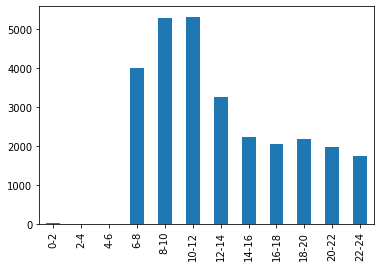

In [65]:
df['group'].value_counts().reindex(['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-24']).plot.bar()

In [42]:
set(hashtag)

{'3ZAAAP',
 '3แซ่บ',
 '4NOLOGUE',
 'AAECASEPASS',
 'AB61X',
 'AB6IX',
 'AB6IX1STFANMEETING',
 'AB6IX1STFANMEETINGINBKK',
 'AB6IX1STFMINBKK',
 'AB6IXINBKK',
 'ABNEW',
 'AHGASESFIGHTING',
 'AHNYUJIN',
 'AIRPOD',
 'AIRPODS',
 'ATEEZ',
 'BAMBAM',
 'BDJINYOUNG',
 'BDMARKTUAN',
 'BDYOUNGJAE',
 'BIGBANG',
 'BIGSTAR',
 'BLACKPINK',
 'BOSS',
 'BOYSTORY',
 'BRINGTHESOUL_DOCUSERIES',
 'BTS',
 'BVNDIT',
 'CHAEUNWOOINBKK',
 'CHUNGHA',
 'CIX',
 'CIXHELLOSTRANGERINBKK',
 'COVERSTARK',
 'COVERSTARKDANCE',
 'DANIELKSOLODEBUT',
 'DAY6GRAVITYINBKK',
 'DDD',
 'DENLIE',
 'DONGPYO',
 'ECLIPSE',
 'EVERGLOW',
 'EVERGROW',
 'EXO',
 'EXOELEMENTTH',
 'EXOPLORATIONINBKK',
 'EXPLORATIONBKK',
 'EXPLORATIONINBBK',
 'EXPLORATIONINBKK',
 'EXPLORATIONINBKKขายบัตร',
 'EXPLORATIONINBKKแลกบัตร',
 'EXPLORATIONINSINGAPORE',
 'FANFESTINBKK',
 'FLASH',
 'FLAϞH',
 'FMMพร้อมส่ง',
 'GIDLE',
 'GIVEAWAYAB6IXINBKK',
 'GOLDENCHILD',
 'GOLDENNESS',
 'GOLDEN_CHILD',
 'GOT2DAY2019',
 'GOT7',
 'GOT71STFANEVENTINTHAILAND',
 'GOT7FANFESTI

# Day 1

In [43]:
boystory = hashtag.count('BOYSTORY')
everglow = hashtag.count('EVERGLOW')
goldenchild = hashtag.count('GOLDENCHILD') + hashtag.count('GOLDEN_CHILD')
got7 = hashtag.count('GOT7')
itzy = hashtag.count('ITZY')
kimjaehwan = hashtag.count('KIMJAEHWAN') + hashtag.count('คิมแจฮวาน')
nature = hashtag.count('NATURE')
oneus = hashtag.count('ONEUS')
theboyz = hashtag.count('THEBOYZ')
x1 = hashtag.count('X1')
nichkhun = hashtag.count('NICHKHUN') + hashtag.count('นิชคุณ')
gidle = hashtag.count('G_I_DLE') + hashtag.count('GIDLE')
ab6ix = hashtag.count('AB6IX')
ateez = hashtag.count('ATEEZ')
bvndit = hashtag.count('BVNDIT')
chungha = hashtag.count('CHUNGHA')
izone = hashtag.count('IZONE')
straykids = hashtag.count('STRAYKIDS')
varivary = hashtag.count('VERIVERY')

In [44]:
artist = ['BOYSTORY', 'EVERGLOW', 'GOLDENCHILD', 'GOT7', 'ITZY', 'KIMJAEHWAN', 'NATURE', 'ONEUS', 'THEBOYZ', 'X1', 'NICHKHUN', 'G_I_DLE', 'AB6IX', 'ATEEZ', 'BVNDIT', 'CHUNGHA', 'IZONE', 'STRAYKIDS', 'VERIVERY']
hashtag_count = [boystory, everglow, goldenchild, got7, itzy, kimjaehwan, nature, oneus, theboyz, x1, nichkhun, gidle, ab6ix, ateez, bvndit, chungha, izone, straykids, varivary]
artist_df = pd.DataFrame({'artist':artist, 'hashtag_count':hashtag_count})
artist_df = artist_df.set_index('artist')

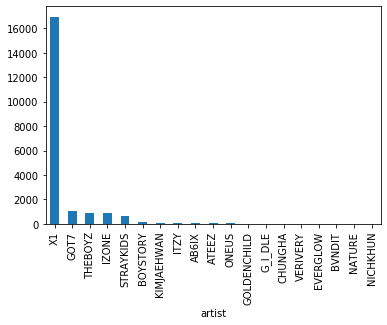

In [45]:
artist_df.sort_values(by=['hashtag_count'], ascending=False)['hashtag_count'].plot.bar()

# Log nomalized

In [46]:
import numpy as np
import pandas as pd

artist_df['lognorm'] = np.log(1+artist_df['hashtag_count'])

In [56]:
# artist_df['lognorm'].plot.bar()

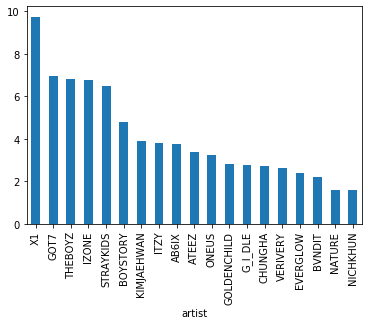

In [48]:
artist_df.sort_values(by=['lognorm'], ascending=False)['lognorm'].plot.bar()

In [49]:
hashtag.count('ITZY')

43

In [55]:
artist_df

,hashtag_count,lognorm
artist,,
BOYSTORY,120,4.795791
EVERGLOW,10,2.397895
GOLDENCHILD,16,2.833213
GOT7,1024,6.932448
ITZY,43,3.784190
KIMJAEHWAN,47,3.871201
NATURE,4,1.609438
ONEUS,25,3.258097
THEBOYZ,915,6.820016
